In [23]:
from config_path import add_to_sys_path
add_to_sys_path()  # Call the function to add path

import numpy as np
from sympy.physics.wigner import wigner_3j,wigner_6j
import sympy as sy
from numpy import linalg as LA
from IPython.display import Latex,display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette('terrain')
from energy_levels import MoleculeLevels
np.set_printoptions(precision=5, suppress=True)
import time
from matplotlib.colors import TwoSlopeNorm

In [2]:
import json
import ujson as uj

def get_json_data(file_path,numpy=False,ujson=True):
    if '.json' not in file_path:
        file_path+='.json'
    with open(file_path, 'r') as f:
        if ujson:
            data = uj.load(f)
        else:
            data = json.load(f)
    if numpy:
        data = np.array(data)
    return data

def save_json_data(data,file_path,ujson=True):
    if type(data) is np.ndarray:
        data_save = data.tolist()
    else:
        data_save=data
    if '.json' not in file_path:
        file_path+='.json'
    with open(file_path,'w') as f:
        if ujson:
            uj.dump(data_save,f)
        else:
            json.dump(data_save,f)
    print('Data saved to', file_path)

In [3]:
# N=1
Bstep = 0.02
deltaB=Bstep
Bz = np.arange(0.0,20+Bstep,Bstep)
# Bz[0]=1e-2
Estep = 0.1
Ez = np.arange(0.0,200+Estep,Estep)
print(len(Ez),len(Bz))
print(len(Ez)*len(Bz))

2001 1001
2003001


In [4]:
read = True
date = '20220503'
folder = r'JSON_data/'
N=1

if read:
    state_dict = {}
    eval_dict = {}
    evec_dict = {}
    PTV_dict = {}
#     for M in range(-(N+1),N+2,1):
    for M in [-1,1]:
        M_state = MoleculeLevels.initialize_state('CaOH','40','X010',[N],M_values = 'custom',I=[0,1/2],S=1/2,round=10,M_range=[M],P_values=[1/2,3/2])
        state_dict[M] = M_state
        print(M)
        eval_dict[M] = get_json_data(folder+'X010_CaOH_N{}_M{}_EB_grid_evals_{}'.format(N,M,date),numpy=True)
        PTV_dict[M] = get_json_data(folder+'X010_CaOH_N{}_M{}_EB_grid_PTV_{}'.format(N,M,date),numpy=True)
        evec_dict[M] = get_json_data(folder+'X010_CaOH_N{}_M{}_EB_grid_evecs_{}'.format(N,M,date),numpy=True)
    mesh = get_json_data(folder+'X010_CaOH_N{}_EzBz_grid_{}'.format(N,date),numpy=True)

-1
1


-1
1


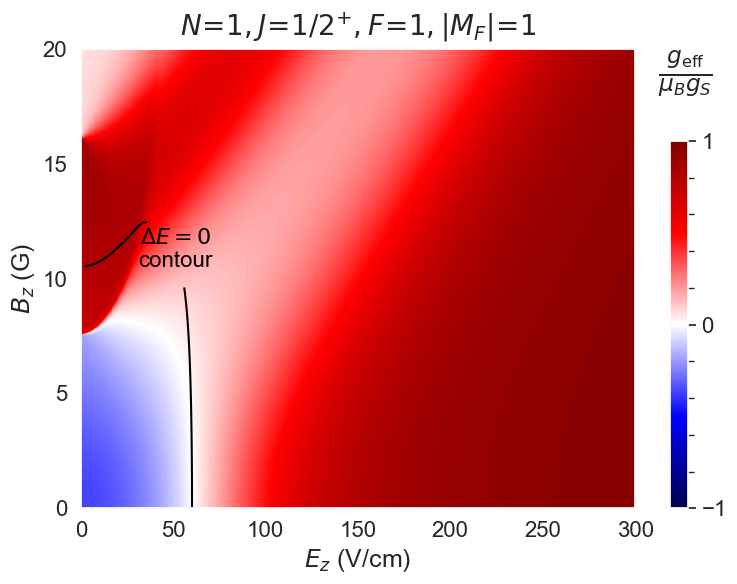

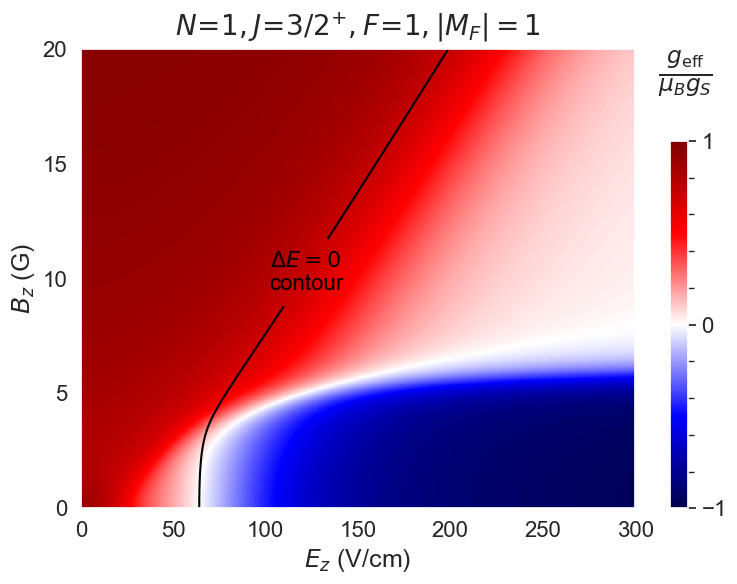

In [5]:
muBgS=1.399624494*2.0023
with_contour = True
for M in eval_dict.keys():
    print(M)
    if M!=1:
        continue
    evals_EB = eval_dict[M]-eval_dict[-M]
    PTV_EB = PTV_dict[M]-PTV_dict[-M]
    for i in [3,4]:
        plt.figure(figsize=(8,6))
        if i == 3:
            plt.title(r'$N\!=\!1, J\!=\!1/2^{+}, F\!=\!1, |M_F|\!=\!1$',fontsize=20,pad=10)
        if i == 4:
            plt.title(r'$N\!=\!1,J\!=\!3/2^{+},F\!=\!1,|M_F|=1$',fontsize=20,pad=10)
        E_EB = evals_EB[i]
        PTV = PTV_EB[i]
        geff = np.gradient(evals_EB[i])[1]/deltaB
#         EB_interp = RectBivariateSpline(Ez,Bz,E_EB)
#         geff_interp = RectBivariateSpline(Ez,Bz,geff)
        plt.grid(False)
        plt.pcolormesh(*mesh,geff/muBgS,shading='auto',rasterized=True,cmap=sns.color_palette("seismic", as_cmap=True),norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))#,vmin=-1,vmax=1)
#         plt.pcolormesh(Ep,Bp,geff_interp(Ep,Bp).T/muBgS,rasterize=True,shading='gouraud',cmap=sns.color_palette("seismic", as_cmap=True),norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))#,vmin=-1,vmax=1)
        cbar = plt.colorbar(shrink=0.8,anchor=(0.0,0),ticks=[-1,0,1])
        cbar.set_label(label=r'$\frac{g_\mathrm{eff}}{\mu_B g_S}$',fontsize=24,rotation=0,labelpad=-30,y=1.25)
        cbar.minorticks_on()
        cbar.ax.tick_params(labelsize=16)
        if with_contour:
            try:
                conmap = plt.contour(*mesh[:,8:,1:],E_EB[8:,1:],colors='black',linewidths=1.5,levels=[0],vmin=-0.25,vmax=0.25)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#                 conmap = plt.contour(Ep[1:],Bp[1:],EB_interp(Ep[1:],Bp[1:]).T,colors='black',linewidths=1,levels=[0],vmin=-0.25,vmax=0.25)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
                lbl = plt.clabel(conmap, fmt={0:r'$\Delta E=0$'+'\ncontour'},colors='black',inline=True,inline_spacing=2,manual=[(80,12)],fontsize=16)
                for x in lbl:
                    x.set_rotation(0)
    #             cbar = plt.colorbar()
    #             cbar.minorticks_on()
            except ValueError:
                print("Can't plot this data")
#         plt.title('Differential G-Factor'.format(i,M),fontsize=18)
        plt.xlabel(r'$E_z$ (V/cm)',fontsize=18)
        plt.ylabel(r'$B_z$ (G)',fontsize=18)
        plt.minorticks_on()
        plt.xticks(fontsize=16)
        plt.yticks([0,5,10,15,20],fontsize=16)
        plt.tight_layout()
#         plt.savefig('CaOH_N1_zerog_{}_v2a.svg'.format(i),bbox_inches='tight')

-1
1


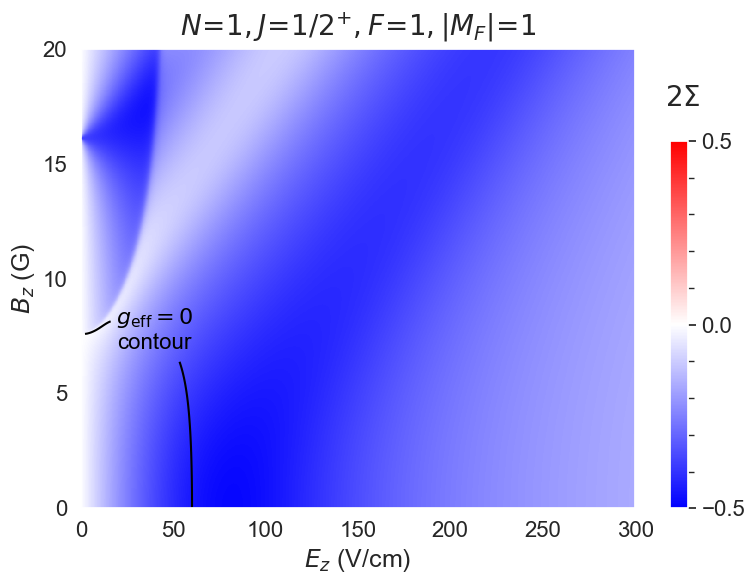

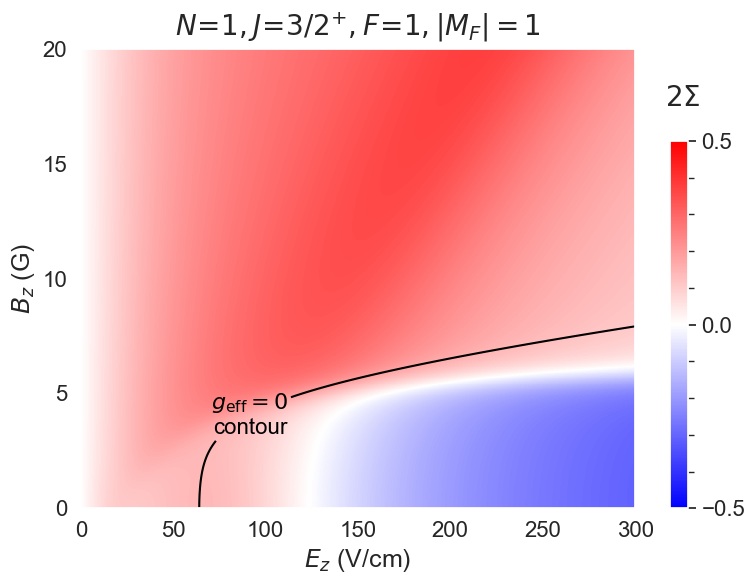

In [6]:
muBgS=1.399624494*2.0023
with_contour = True
for M in eval_dict.keys():
    print(M)
    if M!=1:
        continue
    evals_EB = eval_dict[M]-eval_dict[-M]
    PTV_EB = PTV_dict[M]-PTV_dict[-M]
    for i in [3,4]:
        plt.figure(figsize=(8,6))
        if i == 3:
            plt.title(r'$N\!=\!1, J\!=\!1/2^{+}, F\!=\!1, |M_F|\!=\!1$',fontsize=20,pad=10)
        if i == 4:
            plt.title(r'$N\!=\!1,J\!=\!3/2^{+},F\!=\!1,|M_F|=1$',fontsize=20,pad=10)
        E_EB = evals_EB[i]
        PTV = PTV_EB[i]
        geff = np.gradient(evals_EB[i])[1]/deltaB
#         EB_interp = RectBivariateSpline(Ez,Bz,E_EB)
#         geff_interp = RectBivariateSpline(Ez,Bz,geff)
        plt.grid(False)
        plt.pcolormesh(*mesh,PTV,shading='auto',rasterized=True,cmap=sns.color_palette("bwr", as_cmap=True),norm=TwoSlopeNorm(vmin=-0.5,vcenter=0,vmax=0.5))#,vmin=-1,vmax=1)
#         plt.pcolormesh(Ep,Bp,geff_interp(Ep,Bp).T/muBgS,rasterize=True,shading='gouraud',cmap=sns.color_palette("seismic", as_cmap=True),norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))#,vmin=-1,vmax=1)
        cbar = plt.colorbar(shrink=0.8,anchor=(0.0,0),ticks=[-0.5,0,0.5])
        cbar.set_label(label=r'$2\Sigma$',fontsize=20,rotation=0,labelpad=-45,y=1.15)
        cbar.minorticks_on()
        cbar.ax.tick_params(labelsize=16)
        if with_contour:
            try:
#                 conmap = plt.contour(*mesh[:,8:,1:],E_EB[8:,1:],colors='black',linewidths=1,levels=[0],vmin=-0.25,vmax=0.25)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
# #                 conmap = plt.contour(Ep[1:],Bp[1:],EB_interp(Ep[1:],Bp[1:]).T,colors='black',linewidths=1,levels=[0],vmin=-0.25,vmax=0.25)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#                 lbl = plt.clabel(conmap, fmt={0:r'$\Delta E=0$'+'\ncontour'},colors='black',inline=True,inline_spacing=2,manual=[(80,12)],fontsize=16)
                conmap2 = plt.contour(*mesh[:,9:,1:],geff[9:,1:],colors='black',linewidths=1.5,levels=[0],vmin=-0.25,vmax=0.25)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
                lbl2 = plt.clabel(conmap2, fmt={0:r'$g_\mathrm{eff}=0$'+'\ncontour'},colors='black',inline=True,inline_spacing=2,manual=[(50,9)],fontsize=16)
                for x in lbl:
                    x.set_rotation(0)
                for x in lbl2:
                    x.set_rotation(0)
    #             cbar = plt.colorbar()
    #             cbar.minorticks_on()
            except ValueError:
                print("Can't plot this data")
#         plt.title('Differential G-Factor'.format(i,M),fontsize=18)
        plt.xlabel(r'$E_z$ (V/cm)',fontsize=18)
        plt.ylabel(r'$B_z$ (G)',fontsize=18)
        plt.minorticks_on()
        plt.xticks(fontsize=16)
        plt.yticks([0,5,10,15,20],fontsize=16)
        plt.tight_layout()
#         plt.savefig('CaOH_N1_PTV_{}_v2a.svg'.format(i),bbox_inches='tight')

In [7]:
import numpy as np
from sympy.physics.wigner import wigner_3j,wigner_6j
import sympy as sy
from numpy import linalg as LA
from IPython.display import Latex,display
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette('bright')
from energy_levels import MoleculeLevels
from energy_levels import branching_ratios, calculate_TDMs,calculate_TDM_evecs
from functools import partial
np.set_printoptions(precision=5, suppress=True)
from tabulate import tabulate
from matplotlib.collections import LineCollection

In [8]:
X010 = MoleculeLevels.initialize_state('CaOH','40','X010',[1],M_values = 'all',I=[0,1/2],S=1/2,round=8,P_values=[1/2,3/2],trap=False)

In [10]:
B0 = 1e-4
E0 = 0
evals, evecs = X010.eigensystem(E0,B0,order=True,method='torch')
# X010.eigensystem(E0,B0);
N_idx = [X010.select_q({'N':N}) for N in [1]]

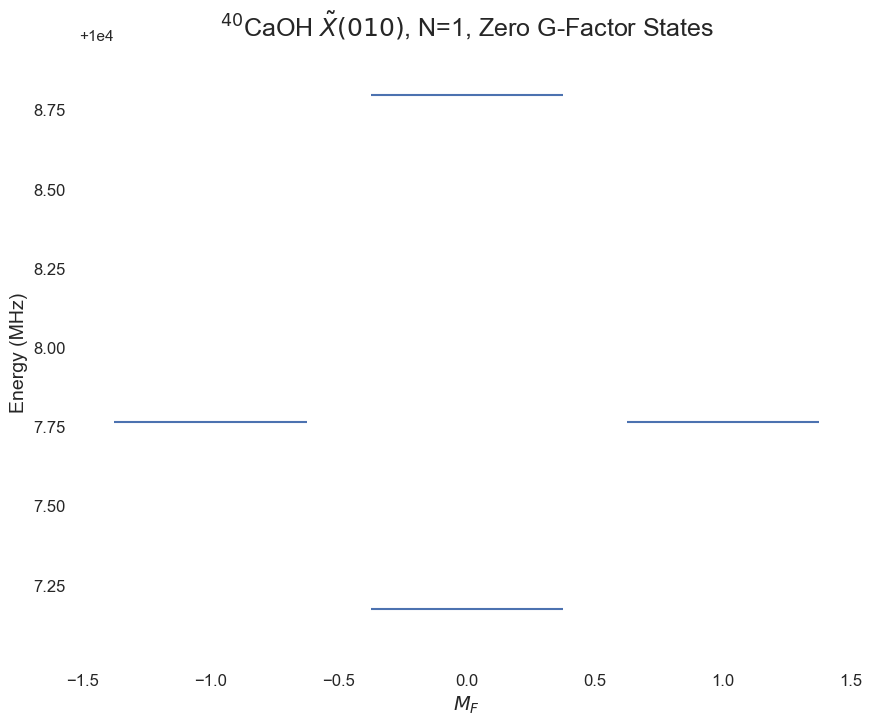

In [11]:
N=1
X010.display_levels(60.4,1e-3,'F',idx=X010.select_q({'N':1,'J':[1/2]},parity='+'),label=False,parity=True,label_q=[q for q in X010.q_str if q not in ['K']],label_off=0.05,figsize=(10,8),alt_label=False)
plt.title(X010.state_str+', N={}, Zero G-Factor States'.format(N,E0,B0),fontsize=18)
# plt.xlim(-3.5,3.5)
# plt.ylim(10000,10020)
plt.grid(False)
ax = plt.gca()
ax.set_facecolor('None')

In [12]:
X010.eigensystem(0,1e-3)
zero1_idx = X010.select_q({'N':1,'J':[0.5],'F':[1],'M':[-1,1]},parity='+')
zero2_idx = X010.select_q({'N':1,'J':[1.5],'F':[1],'M':[-1,1]},parity='+')
zero1_idx_Mm = X010.select_q({'N':1,'J':[0.5],'F':[1],'M':[-1]},parity='+')
zero1_idx_Mp = X010.select_q({'N':1,'J':[0.5],'F':[1],'M':[1]},parity='+')
zero2_idx_Mm = X010.select_q({'N':1,'J':[1.5],'F':[1],'M':[-1]},parity='+')
zero2_idx_Mp = X010.select_q({'N':1,'J':[1.5],'F':[1],'M':[1]},parity='+')

In [13]:
Bz = np.linspace(1e-4,100,5001)
Ez = np.linspace(0,200,2501)

In [14]:
X010.StarkMap(Ez,1e-6)
g_v_E=X010.g_eff_Map(step=1e-4)

In [15]:
sns.set_style('ticks',{'xtick.direction':'in','ytick.direction':'in','xtick.top':True,'xtick.bottom':False})

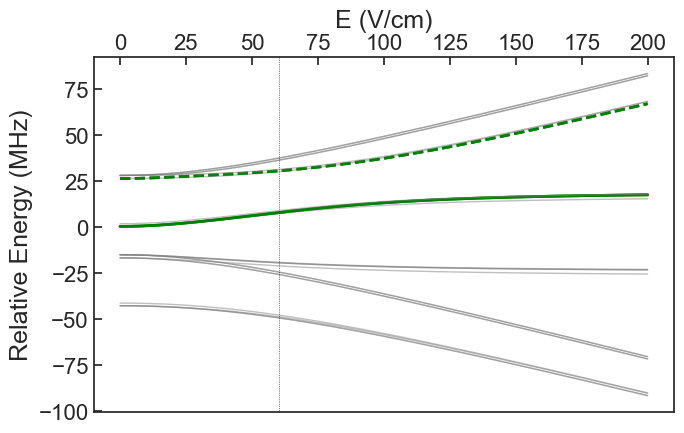

In [16]:
fig = plt.figure(figsize=(7,4.5))
# alpha=0.2
ax = fig.gca()
for i in range(len(X010.evals_E.T)):#range(len(X010_174.g_eff_E.T)):
#     plt.plot(Ez,X010.evals_E.T[i]-10000,linewidth=2)
    if i in zero1_idx or i in zero2_idx:
        alpha = 1
        if i in zero1_idx_Mp:
            color = 'green'
            linestyle='-'
        elif i in zero2_idx_Mp:
            color='green'
            linestyle='--'
        elif i in zero1_idx_Mm:
            color='green'
            linestyle='-'
        elif i in zero2_idx_Mm:
            color='green'
            linestyle='--'
        plt.plot(Ez,X010.evals_E.T[i]-10000,alpha=alpha,linewidth=2,color=color,linestyle=linestyle)
    else:
        alpha = 0.5
        plt.plot(Ez,X010.evals_E.T[i]-10000,alpha=alpha,linewidth=1,color='gray')
plt.axvline(60.4,color='black',linestyle='dotted',linewidth=0.5)
plt.xlabel('E (V/cm)',fontsize=18)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
plt.ylabel(r'Relative Energy (MHz)',fontsize=18)
# plt.title(X010.state_str + ' Stark Shifts',fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.tight_layout()
# plt.savefig('CaOH_N1_energy_vsE_v3.svg',bbox_inches='tight')

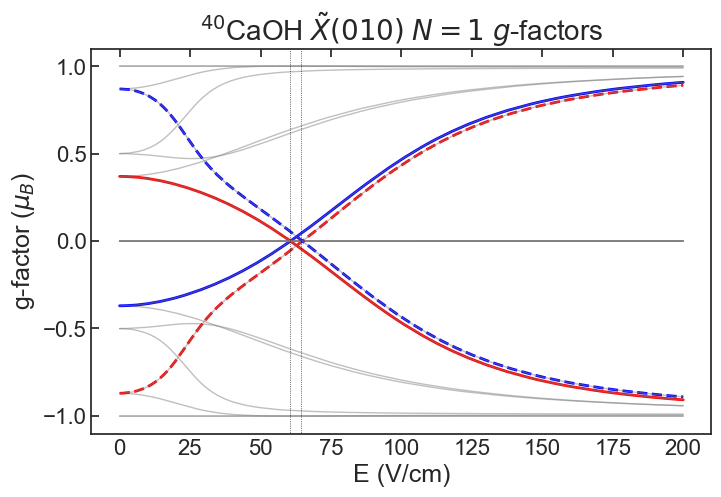

In [17]:
plt.figure(figsize=(8,5))
alpha=0.2
for i in range(len(X010.g_eff_E.T)):#range(len(X010_174.g_eff_E.T)):
    if i in zero1_idx or i in zero2_idx:
        alpha = 1
        if i in zero1_idx_Mp:
            color = 'blue'
            linestyle='-'
        elif i in zero2_idx_Mp:
            color='blue'
            linestyle='--'
        elif i in zero1_idx_Mm:
            color='red'
            linestyle='-'
        elif i in zero2_idx_Mm:
            color='red'
            linestyle='--'
        plt.plot(Ez,X010.g_eff_E.T[i],alpha=alpha,linewidth=2,color=color,linestyle=linestyle)
#     else:
    alpha = 0.5
    plt.plot(Ez,X010.g_eff_E.T[i],alpha=alpha,linewidth=1,color='gray')
plt.axvline(60.4,color='black',linestyle='dotted',linewidth=0.5)
plt.axvline(64.4,color='black',linestyle='dotted',linewidth=0.5)
plt.xlabel('E (V/cm)',fontsize=18)
plt.ylabel(r'g-factor ($\mu_B$)',fontsize=18)
plt.title(X010.state_str + ' $N=1$ $\it{g}$-factors',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks([-1,-0.5,0,0.5,1],fontsize=16);
# plt.tight_layout()
# plt.savefig('CaOH_N1_gfactor_vsE_v2.svg',bbox_inches='tight')

In [19]:
X010.PTV_Map('EDM','E',plot=False)

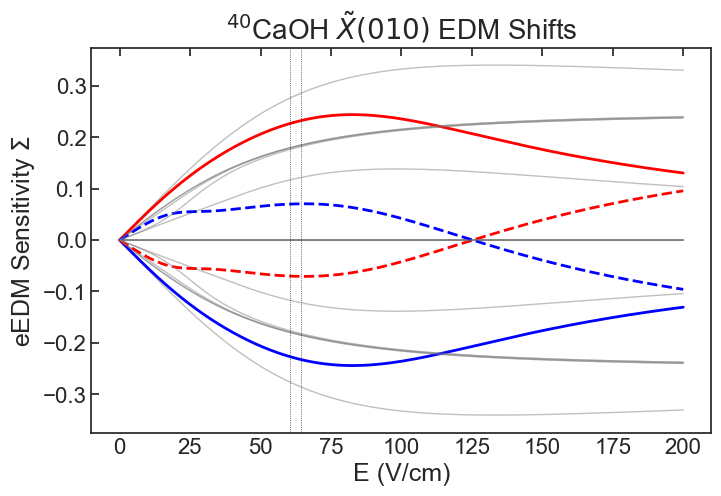

In [21]:
plt.figure(figsize=(8,5))
for i in range(len(X010.PTV_E.T)):#range(len(X010_174.g_eff_E.T)):
    if i in zero1_idx or i in zero2_idx:
        alpha = 1
        if i in zero1_idx_Mp:
            color = 'blue'
            linestyle='-'
        elif i in zero2_idx_Mp:
            color='blue'
            linestyle='--'
        elif i in zero1_idx_Mm:
            color='red'
            linestyle='-'
        elif i in zero2_idx_Mm:
            color='red'
            linestyle='--'
        plt.plot(Ez,X010.PTV_E.T[i],alpha=alpha,linewidth=2,color=color,linestyle=linestyle)
    else:
        alpha = 0.5
        plt.plot(Ez,X010.PTV_E.T[i],alpha=alpha,linewidth=1,color='gray')
plt.axvline(60.4,color='black',linestyle='dotted',linewidth=0.5)
plt.axvline(64.4,color='black',linestyle='dotted',linewidth=0.5)
plt.xlabel('E (V/cm)',fontsize=18)
plt.ylabel(r'eEDM Sensitivity $\Sigma$',fontsize=18)
plt.title(X010.state_str + ' EDM Shifts',fontsize=20);
plt.yticks([-0.3,-0.2,-0.1,0,0.1,0.2,0.3],fontsize=16)
plt.xticks(fontsize=16);
# plt.tight_layout()
# plt.savefig('CaOH_N1_EDM_vsE_v2.svg',bbox_inches='tight')